In [30]:
from catboost import CatBoostRegressor
from all_functions import *
import pandas as pd
from aeon.visualisation import plot_series

window = 12
horizon = 12
derivado = "etanolhidratado"
estado = "SP"
df = read_series(f'../datasets/venda/mensal/uf/{derivado}/mensal_{estado.lower()}_{derivado}.csv')
train, test = train_test_stats(df, horizon)
train_tf = transform_train(train, format="normal")

In [ ]:
data = rolling_window(pd.concat([train_tf, pd.Series([0,0,0,0,0,0,0,0,0,0,0,0], index=test.index)]), window)
data = data.dropna()
X_train, X_test, y_train, _ = train_test_split(data, horizon)

model = CatBoostRegressor(
                          iterations=1000, depth=6, learning_rate=0.1, loss_function='MAPE',
                          task_type="GPU",
                          )
model.fit(X_train, y_train, verbose=False)
predictions = recursive_multistep_forecasting(X_test, model, horizon)
preds = pd.Series(predictions, index=test.index)
preds_real = reverse_regressors(train, preds, format="normal")

In [32]:
preds_real

timestamp
2023-03    637222.766989
2023-04    667708.611331
2023-05    665770.732047
2023-06    711243.551372
2023-07    657914.146321
2023-08    694625.914014
2023-09    739959.565179
2023-10    700174.936355
2023-11    679452.931944
2023-12    699306.269847
2024-01    673178.160480
2024-02    608352.552373
Freq: M, dtype: float64

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='m3'>)

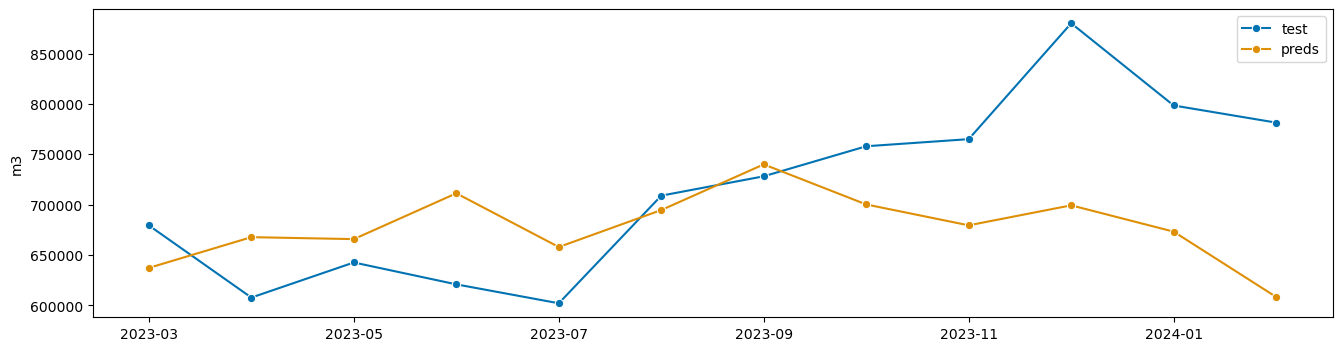

In [33]:
plot_series(test, preds_real, labels=["test", "preds"])